# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [93]:
# 1.Load Data
dataset = pd.read_csv("archive/CarPrice_Assignment.csv")

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [95]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [96]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data cleaning

In [97]:
# Drop car_ID column
dataset= dataset.drop(labels=['car_ID'],axis=1)

In [98]:
# Extracting car company from car name
pd.set_option("display.max_rows", None, "display.max_columns", None)
dataset['CarName'] = dataset['CarName'].str.split(' ',expand=True)
dataset.head(206)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [99]:
# #Handling duplicate values in car name
# nissan and Nissan are same
# toyota and toyouta are same
# vokswagen , volkswagen and vw are same
# mazda and maxda are same
# porcshce and porsche are same

dataset['CarName'] = dataset['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
dataset['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           mazda
51           mazda
52          

In [100]:
dataset['symboling']=dataset['symboling'].astype('str')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [101]:
categorical_cols=dataset.select_dtypes(include=['object']).columns
dataset[categorical_cols]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,1,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,1,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,0,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [102]:
numericalCols = dataset.select_dtypes(exclude=[object]).columns
dataset[numericalCols]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,13495.000
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,16500.000
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.470,9.00,154,5000,19,26,16500.000
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.400,10.00,102,5500,24,30,13950.000
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.400,8.00,115,5500,18,22,17450.000
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.400,8.50,110,5500,19,25,15250.000
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.400,8.50,110,5500,19,25,17710.000
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.400,8.50,110,5500,19,25,18920.000
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.400,8.30,140,5500,17,20,23875.000
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22,17859.167


# Visualise different car names

In [124]:
df = pd.DataFrame(dataset['CarName'].value_counts()).reset_index().rename(columns={'index':'Car Name','CarName':'Count'})
df

,Car Name,Count
0,toyota,32
1,Nissan,18
2,mazda,17
3,honda,13
4,mitsubishi,13
5,volkswagen,12
6,subaru,12
7,peugeot,11
8,volvo,11
9,dodge,9


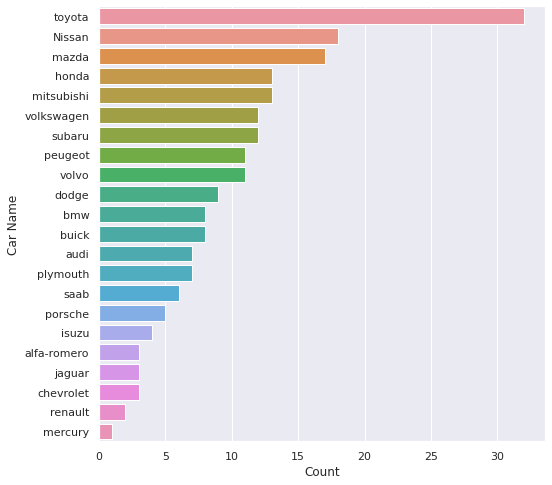

In [125]:
plot = sns.barplot(y='Car Name',x='Count',data=df)


### According to the dataset-

- Toyota is the most suitable car
- mercury is the least suitable car

# Fuel type ratio

In [132]:
df = pd.DataFrame(data=dataset['fueltype'].value_counts())
df

,fueltype
gas,185
diesel,20


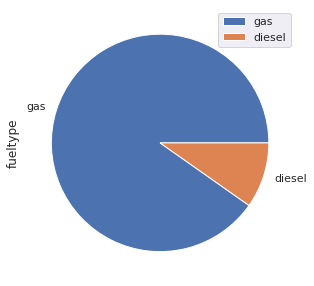

In [134]:
plot = df.plot.pie(y='fueltype',figsize=(5,5))

- most of the cars run on gas

# Price Distrubution 

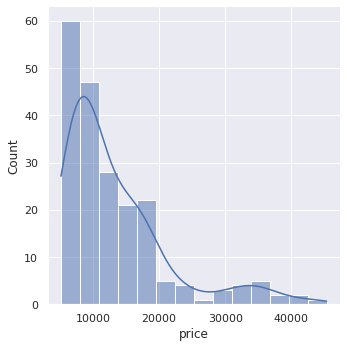

In [143]:
sns.displot(dataset['price'],kde=True)

- price distrubution is right skewed
- most of the cars have a price tag from 0 to 20000

/home/sultan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sultan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

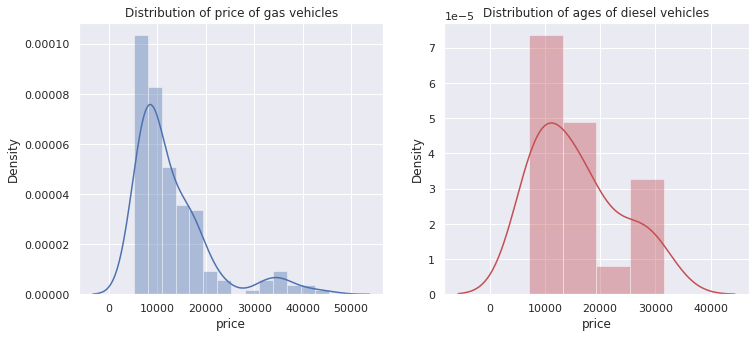

In [150]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(dataset[(dataset.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(dataset[(dataset.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

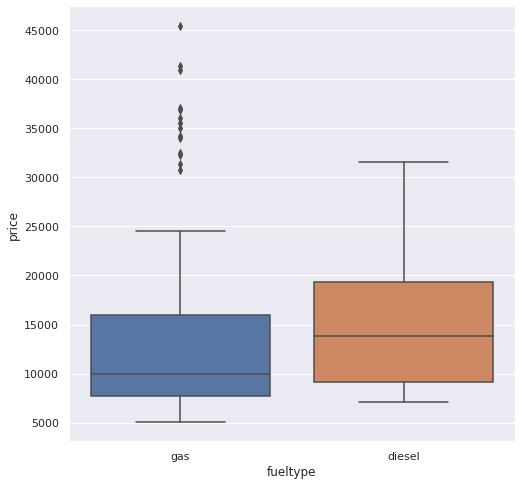

In [152]:
sns.boxplot(x='fueltype',y='price',data=dataset)

- Cars that run on diesel are expensive
- Outliers are present in vehicles that run on gas

In [162]:
df = dataset['aspiration'].value_counts()
df

std      168
turbo     37
Name: aspiration, dtype: int64

In [164]:
df = pd.DataFrame(dataset['aspiration'].value_counts())
df

,aspiration
std,168
turbo,37


<AxesSubplot:ylabel='aspiration'>

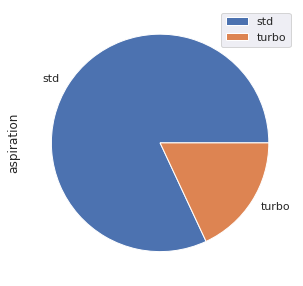

In [165]:
df.plot.pie(y='aspiration',figsize=(5,5))

- most of the cars have std aspiration

# Price  of Std vs Turbo aspiration vehicles

<AxesSubplot:xlabel='aspiration', ylabel='price'>

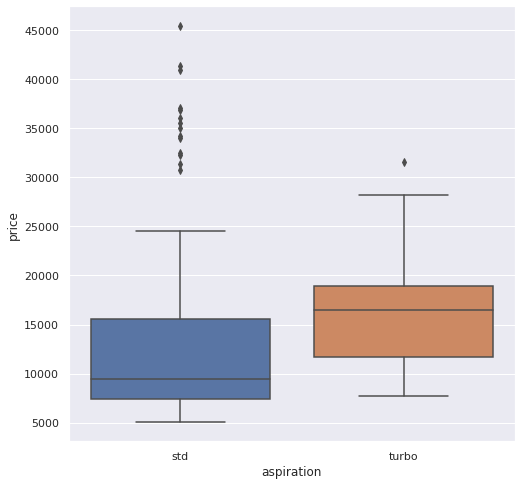

In [166]:
sns.boxplot(x='aspiration', y='price',data=dataset)

- cars with turbo aspiration are expensive 
- outliers are present in cars with std aspiration

# symboling

In [179]:
df = pd.DataFrame(dataset['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})
df

,symboling,count
0,0,67
1,1,54
2,2,32
3,3,27
4,-1,22
5,-2,3


<AxesSubplot:xlabel='symboling', ylabel='count'>

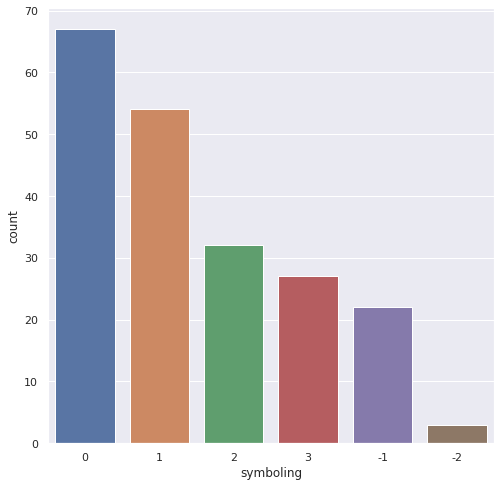

In [181]:
sns.barplot(x='symboling',y='count',data=df)

- most of the cars have a symboling of zero

<AxesSubplot:ylabel='count'>

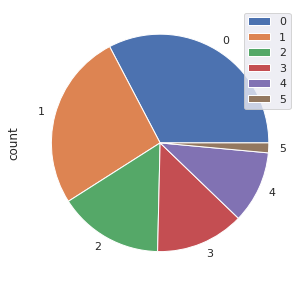

In [183]:
df.plot.pie(y='count',figsize=(5,5))

# Price distribution according to symboling

<AxesSubplot:xlabel='symboling', ylabel='price'>

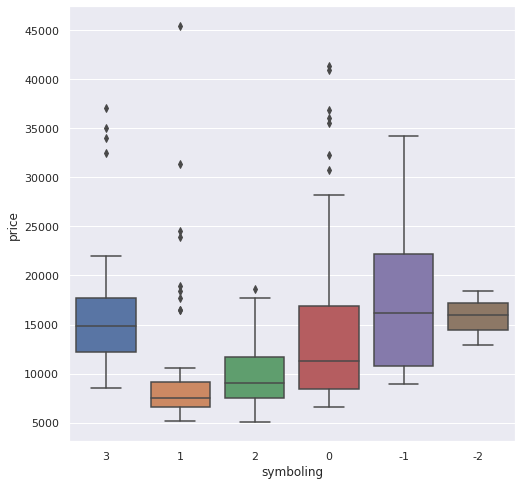

In [184]:
sns.boxplot(x='symboling',y='price',data=dataset)

- -1 cars are the most expensive
- +1 cars are the cheapest

# Door number

In [200]:
df = pd.DataFrame(dataset['doornumber'].value_counts()).rename(columns={'index':'door number','doornumber':'count'})
df

,count
four,115
two,90


<AxesSubplot:ylabel='count'>

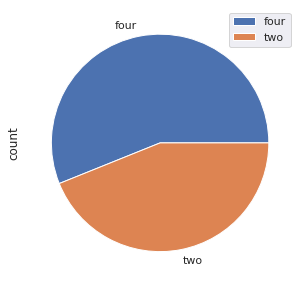

In [201]:
df.plot.pie(y='count',figsize=(5,5))

# Price according to door number

<AxesSubplot:xlabel='doornumber', ylabel='price'>

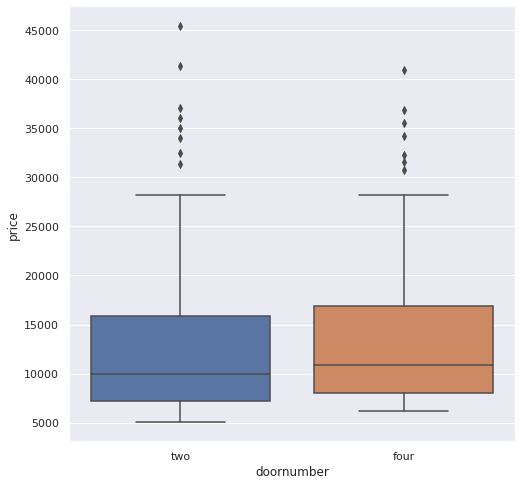

In [202]:
sns.boxplot(x='doornumber',y='price',data=dataset)

- cars having 4 doors are more expensive as compared to cars having 2 doors
- there are more outliers in cars with 2 doors 

# Carbody


In [204]:
df = pd.DataFrame(dataset['carbody'].value_counts())
df


,carbody
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


<AxesSubplot:ylabel='carbody'>

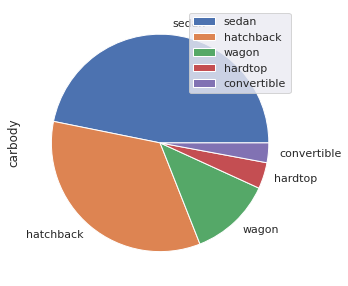

In [206]:
df.plot.pie(y= 'carbody',figsize=(5,5))

- major car body types include sedane and hatchback

# Price according to car body

<AxesSubplot:xlabel='carbody', ylabel='price'>

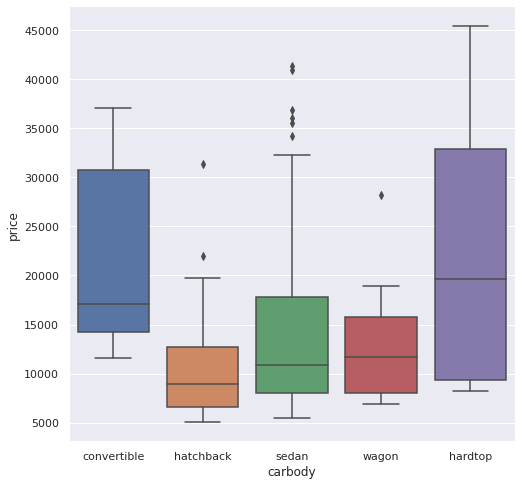

In [207]:
sns.boxplot(x='carbody',y='price',data=dataset)

- cars with body type of hardtop are the most expensive

# Visualising numerical features 

## Wheel base vs price

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

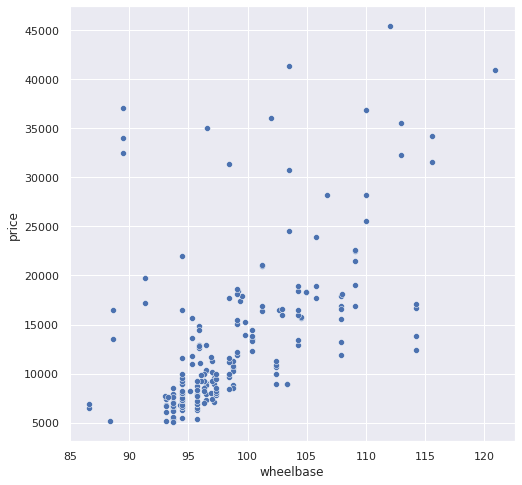

In [217]:
sns.scatterplot(x='wheelbase',y='price',data=dataset)

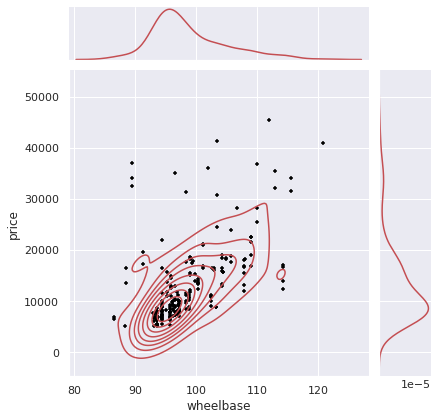

In [232]:
g = sns.jointplot(x='wheelbase',y='price',data=dataset,kind='kde',color='r')
g.plot_joint(plt.scatter,marker='+',color='black',s=20)
g.ax_joint.collections[0].set_alpha(0)

- highly scattered points

## Car length vs price

<AxesSubplot:xlabel='carlength', ylabel='price'>

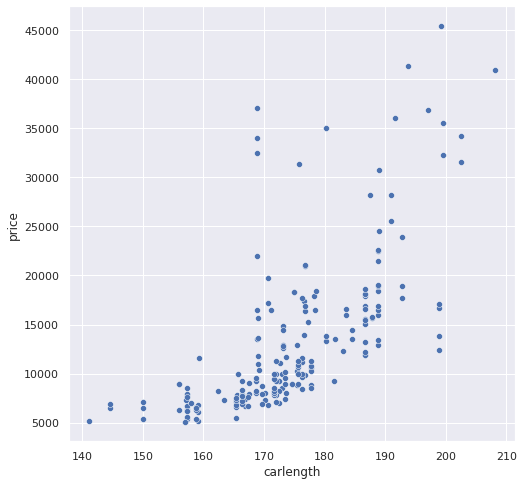

In [233]:
sns.scatterplot(x='carlength',y='price',data=dataset)

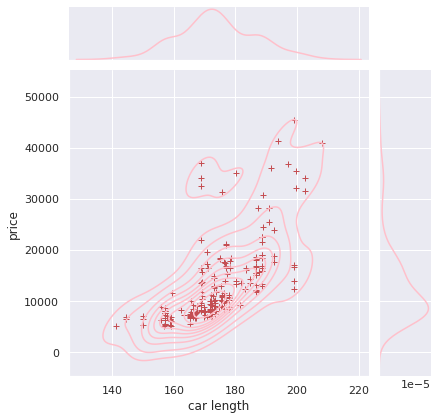

In [258]:
g = sns.jointplot(x="carlength", y="price", data=dataset, kind="kde", color="pink")
g.plot_joint(plt.scatter, c='r',s=30, linewidth=1, marker="+")
g.ax_joint.collections[1].set_alpha(1)
g.set_axis_labels("car length", "price");

- less scattered than wheelbase

## Car width vs price

<AxesSubplot:xlabel='carwidth', ylabel='price'>

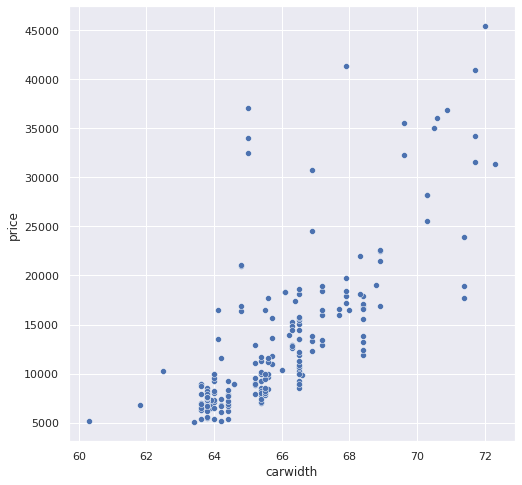

In [259]:
sns.scatterplot(x='carwidth',y='price',data=dataset)

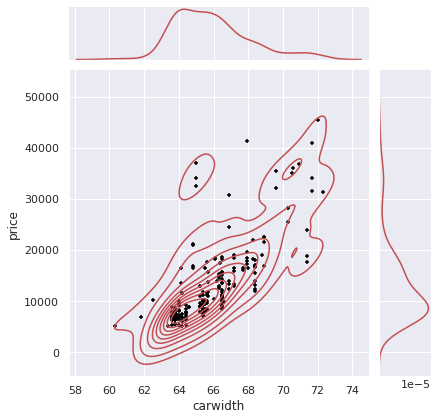

In [263]:
g = sns.jointplot(x='carwidth',y='price',data=dataset,kind='kde',color= 'r')
g.plot_joint(plt.scatter,marker='+',s= 20,color='black')


## Car height vs price

<AxesSubplot:xlabel='carheight', ylabel='price'>

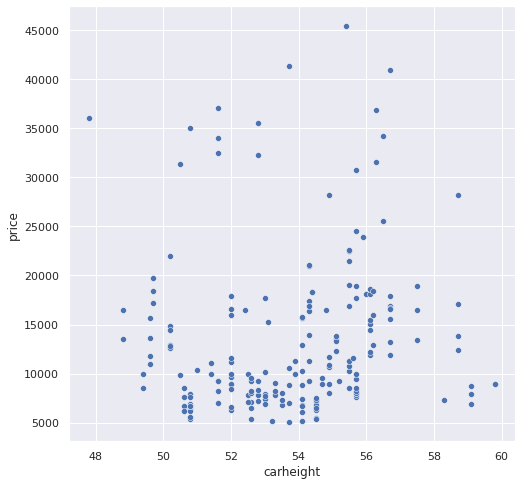

In [264]:
sns.scatterplot(x='carheight',y='price',data=dataset)

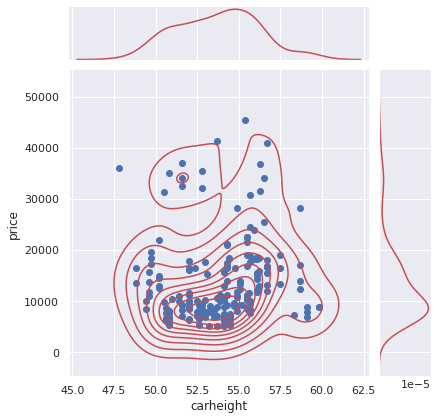

In [270]:
g = sns.jointplot(x='carheight',y='price',data=dataset, color='r',kind='kde')
g.plot_joint(plt.scatter)

- there is a strong relation between car price and cae height

## curbweight vs price

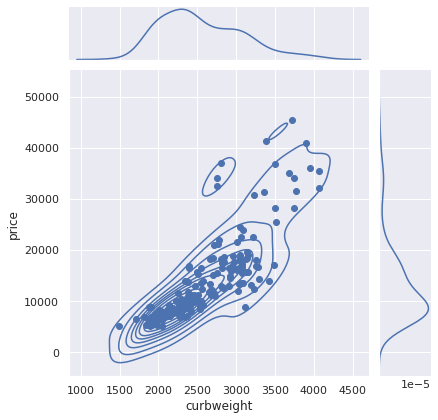

In [274]:
g = sns.jointplot(x='curbweight',y='price',data=dataset, kind='kde')
g.plot_joint(plt.scatter)

- there is a strong relation between curbweight and price tag when curbweight is less than 3000

## Engine size vs price


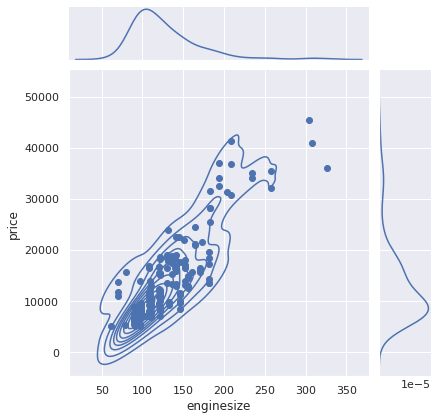

In [284]:
g = sns.jointplot(x='enginesize',y='price',data=dataset,kind='kde')
g.plot_joint(plt.scatter)

# pair plot of numerical features 

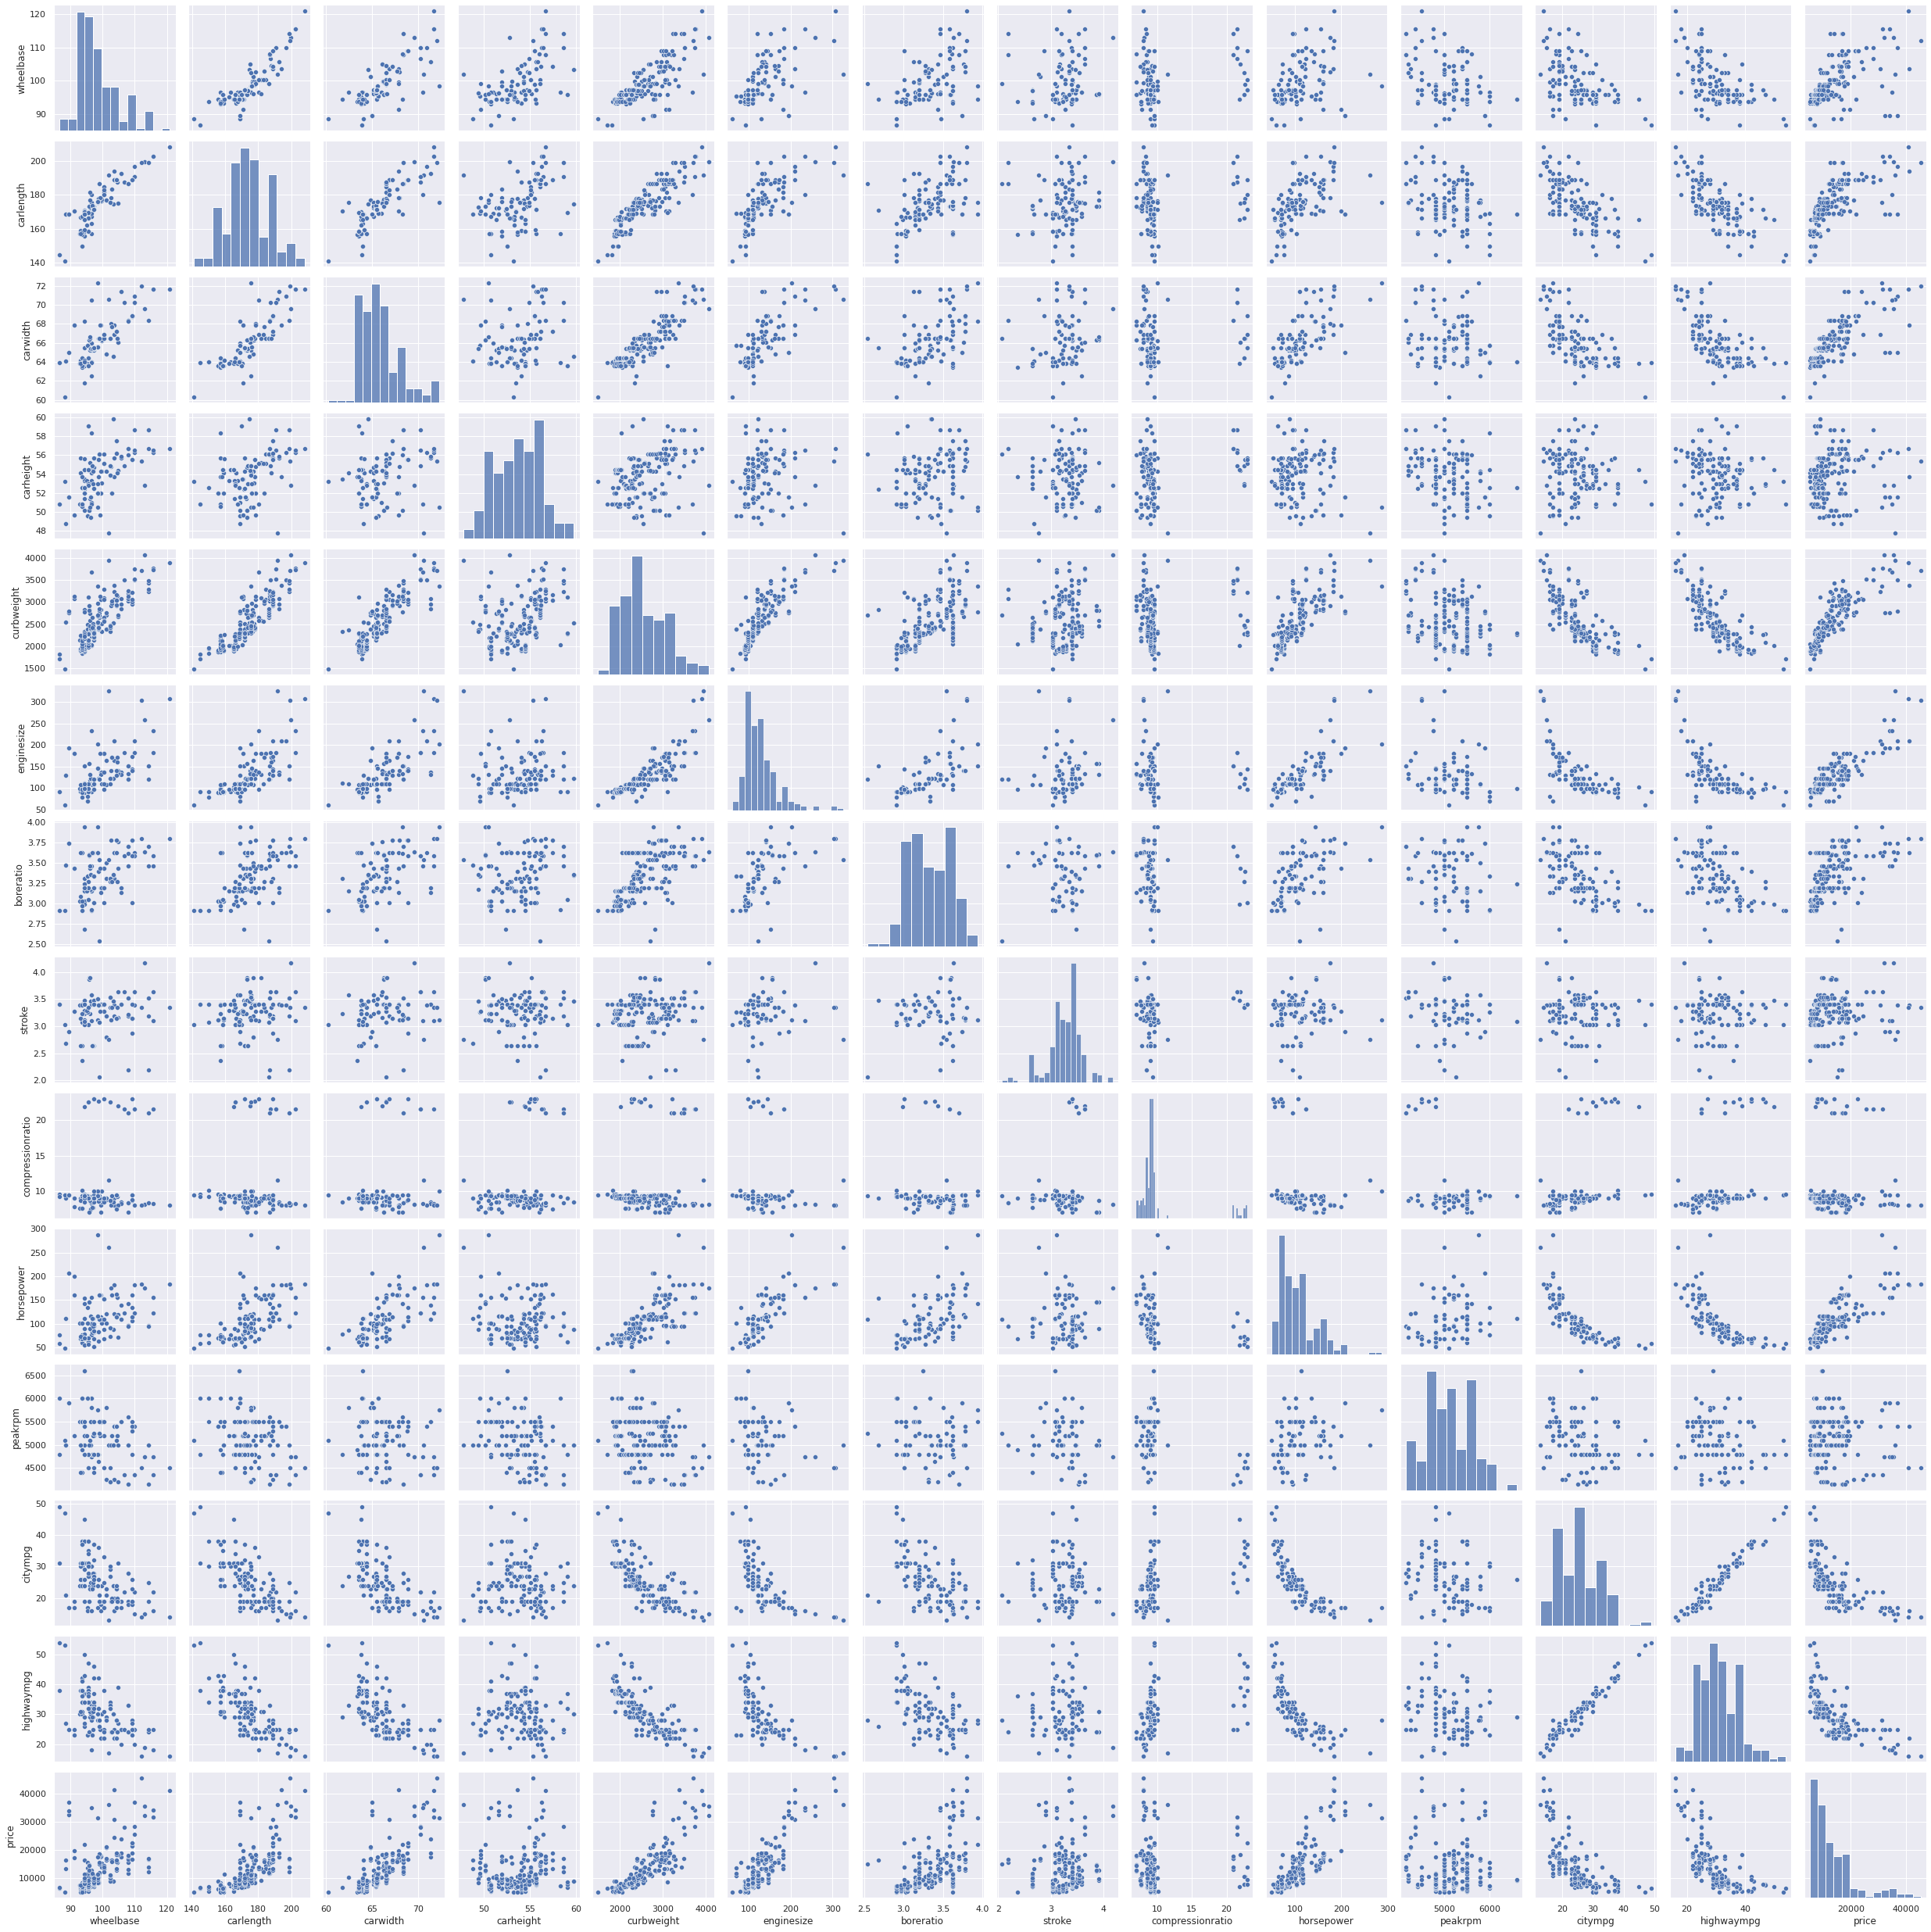

In [285]:
ax = sns.pairplot(dataset[numericalCols])

In [286]:
dataset[numericalCols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

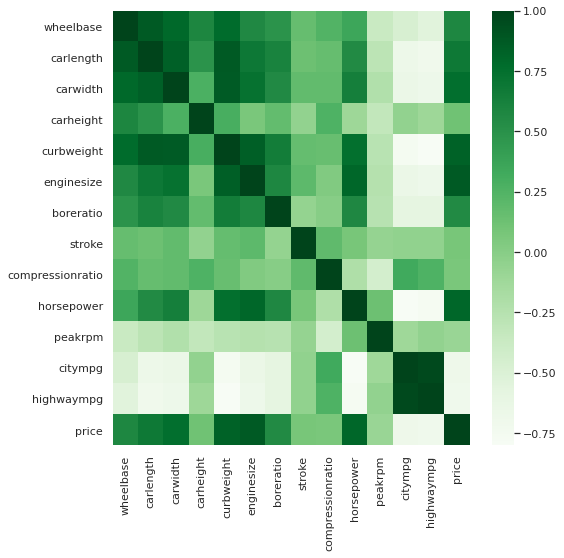

In [290]:
sns.heatmap(dataset[numericalCols].corr(),cmap='Greens')

# Fitting features with price

In [312]:
numericalCols[:-1]

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [305]:
for seg,col in enumerate([numericalCols[:-1]]):
    x,y = seg//4, seg%4
    print(x,'\n',y)

0 
 0


Col wheelbase 

seg 0 

0 0
Col carlength 

seg 1 

0 1
Col carwidth 

seg 2 

0 2
Col carheight 

seg 3 

0 3
Col curbweight 

seg 4 

1 0
Col enginesize 

seg 5 

1 1
Col boreratio 

seg 6 

1 2
Col stroke 

seg 7 

1 3
Col compressionratio 

seg 8 

2 0
Col horsepower 

seg 9 

2 1
Col peakrpm 

seg 10 

2 2
Col citympg 

seg 11 

2 3
Col highwaympg 

seg 12 

3 0


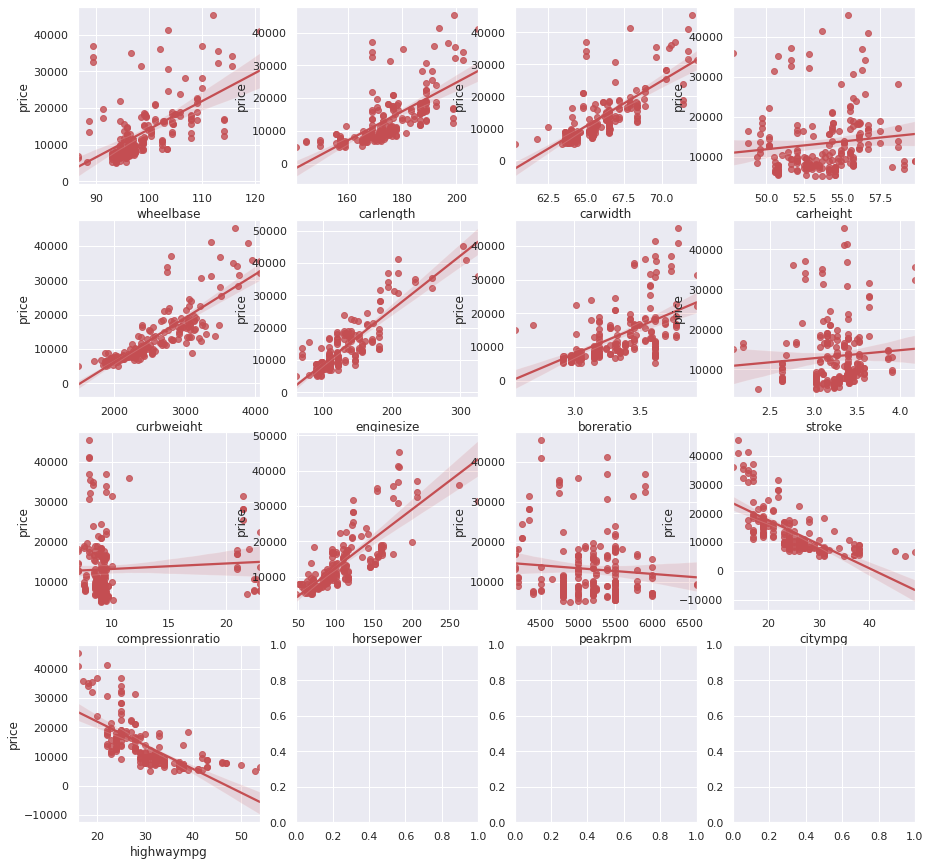

In [324]:
fig ,axes = plt.subplots(4,4,figsize=(15,15))
for seg,col in enumerate(numericalCols[:-1]):
    print('Col',col,'\n')
    print('seg',seg,'\n')
    x,y = seg//4,seg%4
    print(x,y)
    sns.regplot(x=col, y='price' ,data=dataset,ax=axes[x][y],color='r')

# Feature Selection 

In [333]:
X = dataset[numericalCols].drop(['price'],axis=1)
y = dataset.price


# Recursive feature elimination (RFE) with random forest

In [347]:
X = dataset.apply(lambda col : preprocessing.LabelEncoder().fit_transform(col) )
X=X.drop(['CarName','price'],axis=1)
y=dataset['price']


In [349]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()
clf_rf_3

RandomForestRegressor()

In [352]:
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print(rfe)

RFE(estimator=RandomForestRegressor(), n_features_to_select=15)


In [353]:
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [354]:
features=list(X.columns[rfe.support_])
features

['carbody',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

# Data Modelling and Evaluation

In [355]:
x = X[features]

,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,2,22,8,1,92,18,5,23,4,13,30,10,8,10
1,0,2,22,8,1,92,18,5,23,4,13,30,10,8,10
2,2,10,29,16,13,115,28,5,1,28,13,45,10,6,9
3,3,30,45,21,25,66,11,5,13,25,22,27,16,11,13
4,3,28,45,23,25,116,22,5,13,25,5,33,16,5,5
5,3,30,47,22,18,87,22,5,13,25,9,29,16,6,8
6,3,42,67,40,36,118,22,5,13,25,9,29,16,6,8
7,4,42,67,40,36,126,22,5,13,25,9,29,16,6,8
8,3,42,67,40,37,142,19,5,10,25,7,40,16,4,4
9,2,29,49,29,12,136,19,5,10,25,0,48,16,3,5


In [357]:
y = dataset.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

## Random forest regressor

In [365]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9065838247336128

In [377]:
# 2.Check Missing Values
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv("archive/CarPrice_Assignment.csv")
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [378]:
def process_and_normalize_data(dataset, columns_to_remove, columns_to_process):
    encoder = LabelEncoder()
    dataset = dataset.drop(columns_to_remove, axis=1)
    dataset[columns] = dataset[columns].apply(encoder.fit_transform)
    print(dataset[columns])
    return dataset

TRAIN_SIZE = int(dataset.shape[0] * 0.5)
TEST_SIZE = int(dataset.shape[0] * 0.3) + TRAIN_SIZE
print(TRAIN_SIZE, TEST_SIZE)

columns_to_remove = ["CarName"]
columns = ["fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "fuelsystem", "enginetype", "cylindernumber"]

c = ["carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio","horsepower", "peakrpm", "citympg", "highwaympg", "price"]
mean = dataset[c].mean(axis=0)
std = dataset[c].std(axis=0)

dataset = process_and_normalize_data(dataset, columns_to_remove, columns)
dataset['doornumber'] = dataset['doornumber'].map({'two':2,'four':4})
print(dataset.head())
y = dataset.price
x = dataset.drop("price", axis=1)



102 163
     fueltype  aspiration  carbody  drivewheel  enginelocation  fuelsystem  \
0           1           0        0           2               0           5   
1           1           0        0           2               0           5   
2           1           0        2           2               0           5   
3           1           0        3           1               0           5   
4           1           0        3           0               0           5   
5           1           0        3           1               0           5   
6           1           0        3           1               0           5   
7           1           0        4           1               0           5   
8           1           1        3           1               0           5   
9           1           1        2           0               0           5   
10          1           0        3           2               0           5   
11          1           0        3           2          

In [379]:
# 3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
y_train,y_test,y_val = y[:TRAIN_SIZE],y[TRAIN_SIZE:TEST_SIZE],y[TEST_SIZE:]
x_train,x_test, x_val = x[:TRAIN_SIZE], x[TRAIN_SIZE:TEST_SIZE],x[TEST_SIZE:]

In [380]:
# 4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32, input_shape=(24,)))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(6, activation="relu"))
    model.add(keras.layers.Dense(1))
#     5.Compilation Step 
    model.compile(optimizer="rmsprop", metrics=["mae"], loss="mse")

    return model

In [374]:

model = build_model()
#  6.Train the Model with Epochs (100) and validate it
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=4, shuffle=True)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

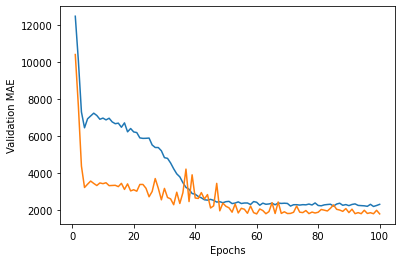

In [54]:
import matplotlib.pyplot as plt

mae = history.history["mae"]
val_mae = history.history["val_mae"]

plt.plot(range(1, len(mae) + 1), mae)
plt.plot(range(1, len(val_mae) + 1), val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [55]:
val_mse, val_mae = model.evaluate(x_test, y_test, verbose=0)
print("Mean Squared Error:",val_mse)
print("Mean Absolute Error:", val_mae)

Mean Squared Error: 43719876.0
Mean Absolute Error: 4265.32470703125


In [56]:
data_to_predict = x_test.to_numpy()[0]
data_to_predict = data_to_predict.reshape((-1, 24))
prediction = model.predict([np.array(data_to_predict)])
print("Predicted Price: ", prediction)
print("actual price", y_test[102])

Predicted Price:  [[24335.664]]
actual price 14399.0
